In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pystan
from fbprophet import Prophet

Must run have pystan 2.18.0.0 installed as 2.19.0.0 does not work with the compiler.

pip install pystan==2.18.0.0 fbprophet

In [29]:
df = pd.read_csv('all_stocks_5yr.csv')
print(df)

              date   open   high    low  close    volume Name
0       2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1       2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2       2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3       2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4       2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL
...            ...    ...    ...    ...    ...       ...  ...
619035  2018-02-01  76.84  78.27  76.69  77.82   2982259  ZTS
619036  2018-02-02  77.53  78.12  76.73  76.78   2595187  ZTS
619037  2018-02-05  76.64  76.92  73.18  73.83   2962031  ZTS
619038  2018-02-06  72.74  74.56  72.13  73.27   4924323  ZTS
619039  2018-02-07  72.70  75.00  72.69  73.86   4534912  ZTS

[619040 rows x 7 columns]


In [131]:
apple = df.loc[df['Name'] == 'AAPL']
appleClose = apple[["date", "close"]]
appleClose["date"] = pd.DatetimeIndex(appleClose["date"])
appleClose.columns = ['ds', 'y']
appleClose.head()

<ipython-input-131-c02ad6431dcb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appleClose["date"] = pd.DatetimeIndex(appleClose["date"])


,ds,y
1259,2013-02-08,67.8542
1260,2013-02-11,68.5614
1261,2013-02-12,66.8428
1262,2013-02-13,66.7156
1263,2013-02-14,66.6556


In [169]:
m = Prophet(interval_width=0.95)
model = m.fit(appleClose)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [170]:
prediction = m.make_future_dataframe(periods=10, freq='m')
forecast = m.predict(prediction)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-02-08,61.841376,50.100224,66.265408,61.841376,61.841376,-3.830770,-3.830770,-3.830770,-1.225618,-1.225618,-1.225618,-2.605153,-2.605153,-2.605153,0.0,0.0,0.0,58.010606
1,2013-02-11,61.858744,51.196903,66.733421,61.858744,61.858744,-2.376210,-2.376210,-2.376210,-1.096613,-1.096613,-1.096613,-1.279598,-1.279598,-1.279598,0.0,0.0,0.0,59.482534
2,2013-02-12,61.864534,52.223275,68.693403,61.864534,61.864534,-1.936937,-1.936937,-1.936937,-1.079825,-1.079825,-1.079825,-0.857112,-0.857112,-0.857112,0.0,0.0,0.0,59.927596
3,2013-02-13,61.870323,52.659523,68.566627,61.870323,61.870323,-1.607716,-1.607716,-1.607716,-1.153733,-1.153733,-1.153733,-0.453983,-0.453983,-0.453983,0.0,0.0,0.0,60.262607
4,2013-02-14,61.876112,52.718456,68.920110,61.876112,61.876112,-1.273387,-1.273387,-1.273387,-1.198044,-1.198044,-1.198044,-0.075343,-0.075343,-0.075343,0.0,0.0,0.0,60.602725


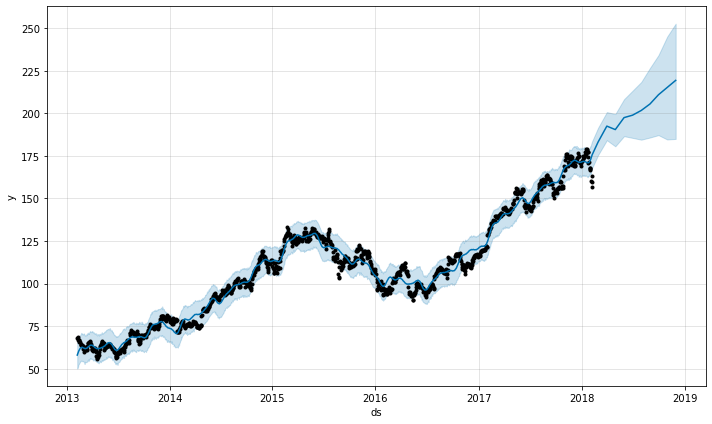

In [171]:
fig = m.plot(forecast)